<a href="https://colab.research.google.com/github/Lexie-v2/Goggle-CO/blob/main/SisOpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Primer programa

Secuencia de referencia: [5, 6, 6, 3, 8, 0, 2, 8, 9, 1, 6, 5, 3, 1, 7, 8, 7, 2, 5, 1]

FIFO:
  Tamaño 3: 17 fallos de página
  Tamaño 4: 16 fallos de página
  Tamaño 5: 15 fallos de página
  Tamaño 6: 15 fallos de página

LRU:
  Tamaño 3: 17 fallos de página
  Tamaño 4: 16 fallos de página
  Tamaño 5: 15 fallos de página
  Tamaño 6: 14 fallos de página

Clock:
  Tamaño 3: 17 fallos de página
  Tamaño 4: 16 fallos de página
  Tamaño 5: 15 fallos de página
  Tamaño 6: 15 fallos de página

Óptimo:
  Tamaño 3: 13 fallos de página
  Tamaño 4: 11 fallos de página
  Tamaño 5: 10 fallos de página
  Tamaño 6: 9 fallos de página


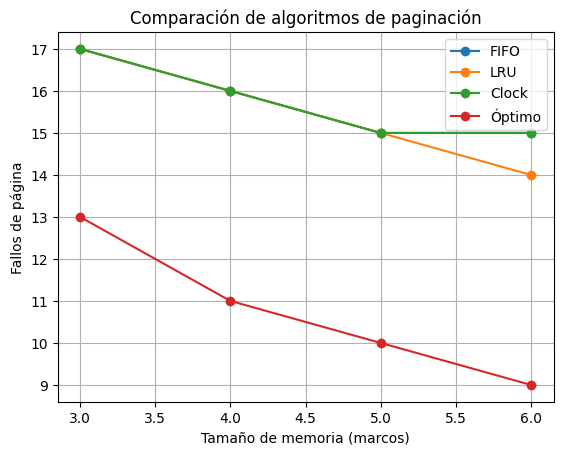

In [ ]:
import random
import matplotlib.pyplot as plt

# Generar la secuencia de referencia aleatoria
def generar_secuencia_referencia(longitud, max_pagina=10):
    return [random.randint(0, max_pagina - 1) for _ in range(longitud)]

# Implementación de FIFO
def fifo(secuencia, marcos):
    memoria = []
    fallos = 0

    for pagina in secuencia:
        if pagina not in memoria:
            fallos += 1
            if len(memoria) == marcos:
                memoria.pop(0)  # Eliminar la página más antigua
            memoria.append(pagina)
    return fallos

# Implementación de LRU
def lru(secuencia, marcos):
    memoria = []
    fallos = 0

    for pagina in secuencia:
        if pagina not in memoria:
            fallos += 1
            if len(memoria) == marcos:
                memoria.pop(0)  # Eliminar la página menos recientemente usada
            memoria.append(pagina)
        else:
            memoria.remove(pagina)  # Mover la página al final
            memoria.append(pagina)
    return fallos

# Implementación de Clock
def clock(secuencia, marcos):
    memoria = [-1] * marcos
    bits_uso = [0] * marcos
    puntero = 0
    fallos = 0

    for pagina in secuencia:
        if pagina in memoria:
            bits_uso[memoria.index(pagina)] = 1  # Actualizar el bit de uso
        else:
            fallos += 1
            while bits_uso[puntero] == 1:  # Buscar un marco disponible
                bits_uso[puntero] = 0
                puntero = (puntero + 1) % marcos
            memoria[puntero] = pagina
            bits_uso[puntero] = 1
            puntero = (puntero + 1) % marcos
    return fallos

# Implementación de Óptimo
def optimo(secuencia, marcos):
    memoria = []
    fallos = 0

    for i in range(len(secuencia)):
        pagina = secuencia[i]
        if pagina not in memoria:
            fallos += 1
            if len(memoria) == marcos:
                max_distancia = -1
                index_remover = -1
                for j in range(len(memoria)):
                    try:
                        distancia = secuencia[i + 1:].index(memoria[j])
                    except ValueError:
                        distancia = float("inf")
                    if distancia > max_distancia:
                        max_distancia = distancia
                        index_remover = j
                memoria.pop(index_remover)
            memoria.append(pagina)
    return fallos

# Comparar algoritmos
def comparar_algoritmos(secuencia, tamaños_memoria):
    resultados = {algoritmo: [] for algoritmo in ["FIFO", "LRU", "Clock", "Óptimo"]}
    for marcos in tamaños_memoria:
        resultados["FIFO"].append(fifo(secuencia, marcos))
        resultados["LRU"].append(lru(secuencia, marcos))
        resultados["Clock"].append(clock(secuencia, marcos))
        resultados["Óptimo"].append(optimo(secuencia, marcos))
    return resultados

# Graficar los resultados
def graficar_resultados(resultados, tamaños_memoria):
    for algoritmo, fallos in resultados.items():
        plt.plot(tamaños_memoria, fallos, label=algoritmo, marker='o')
    plt.xlabel("Tamaño de memoria (marcos)")
    plt.ylabel("Fallos de página")
    plt.title("Comparación de algoritmos de paginación")
    plt.legend()
    plt.grid()
    plt.savefig("comparacion_algoritmos_paginacion.png")
    plt.show()

# Main
if __name__ == "__main__":
    longitud_secuencia = 20
    max_pagina = 10
    tamaños_memoria = [3, 4, 5, 6]

    # Generar la secuencia de referencia
    secuencia = generar_secuencia_referencia(longitud_secuencia, max_pagina)
    print(f"Secuencia de referencia: {secuencia}")

    # Comparar algoritmos
    resultados = comparar_algoritmos(secuencia, tamaños_memoria)

    # Mostrar resultados en consola
    for algoritmo, fallos in resultados.items():
        print(f"\n{algoritmo}:")
        for marcos, fallo in zip(tamaños_memoria, fallos):
            print(f"  Tamaño {marcos}: {fallo} fallos de página")

    # Graficar resultados
    graficar_resultados(resultados, tamaños_memoria)

##2. Segundo programa


Simulando First-Fit...


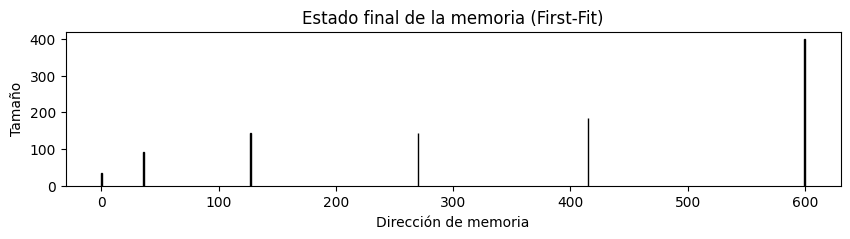


Simulando Best-Fit...


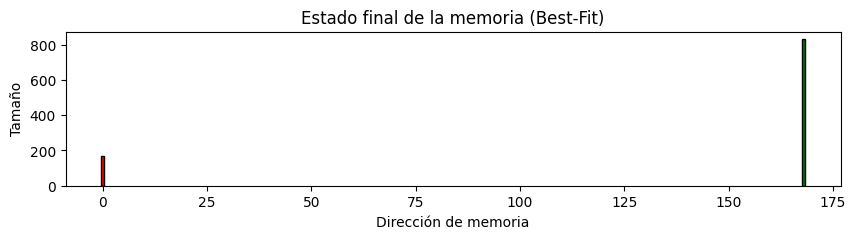


Simulando Worst-Fit...


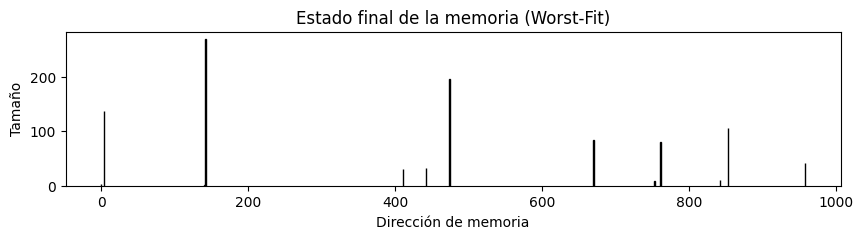

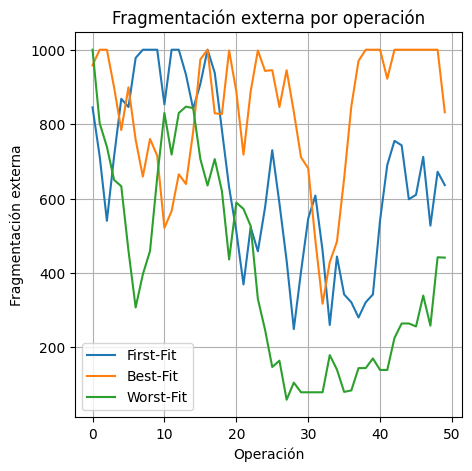


Resultados finales:

First-Fit:
  Tiempo promedio de búsqueda: 0.00 ms
  Fallos por fragmentación: 0

Best-Fit:
  Tiempo promedio de búsqueda: 0.00 ms
  Fallos por fragmentación: 0

Worst-Fit:
  Tiempo promedio de búsqueda: 0.00 ms
  Fallos por fragmentación: 6


In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Parámetros de simulación
MEMORIA_TOTAL = 1000  # Tamaño total de la memoria
NUM_OPERACIONES = 50  # Número de operaciones
MAX_TAMAÑO_BLOQUE = 200  # Tamaño máximo de bloque solicitado

# Representación de bloques de memoria
class Bloque:
    def __init__(self, inicio, tamaño, asignado=False):
        self.inicio = inicio
        self.tamaño = tamaño
        self.asignado = asignado

def inicializar_memoria():
    """Crea un bloque inicial que representa toda la memoria."""
    return [Bloque(0, MEMORIA_TOTAL, False)]

def medir_fragmentacion_externa(memoria):
    """Calcula la fragmentación externa sumando los tamaños de los bloques libres."""
    return sum(b.tamaño for b in memoria if not b.asignado)

def asignar(memoria, tamaño, algoritmo):
    """Asigna un bloque de memoria según el algoritmo especificado."""
    inicio_tiempo = time.time()
    bloques_disponibles = [bloque for bloque in memoria if not bloque.asignado and bloque.tamaño >= tamaño]

    if algoritmo == "First-Fit":
        bloque = next((b for b in bloques_disponibles), None)
    elif algoritmo == "Best-Fit":
        bloque = min(bloques_disponibles, key=lambda b: b.tamaño, default=None)
    elif algoritmo == "Worst-Fit":
        bloque = max(bloques_disponibles, key=lambda b: b.tamaño, default=None)
    else:
        bloque = None

    tiempo_busqueda = (time.time() - inicio_tiempo) * 1000  # Convertir a milisegundos

    if bloque:
        if bloque.tamaño > tamaño:
            nuevo_bloque = Bloque(bloque.inicio + tamaño, bloque.tamaño - tamaño, False)
            memoria.insert(memoria.index(bloque) + 1, nuevo_bloque)
        bloque.tamaño = tamaño
        bloque.asignado = True
        return tiempo_busqueda, False  # Asignación exitosa
    return tiempo_busqueda, True  # Falla de asignación

def liberar(memoria):
    """Libera un bloque aleatorio que esté asignado."""
    bloques_asignados = [bloque for bloque in memoria if bloque.asignado]
    if bloques_asignados:
        bloque = random.choice(bloques_asignados)
        bloque.asignado = False
        combinar_bloques(memoria)

def combinar_bloques(memoria):
    """Combina bloques libres contiguos en la memoria."""
    i = 0
    while i < len(memoria) - 1:
        actual, siguiente = memoria[i], memoria[i + 1]
        if not actual.asignado and not siguiente.asignado:
            actual.tamaño += siguiente.tamaño
            memoria.pop(i + 1)
        else:
            i += 1

def graficar_fragmentacion(fragmentaciones, algoritmos):
    """Genera un gráfico comparativo de la fragmentación externa."""
    plt.figure(figsize=(5, 5))
    for algoritmo, fragmentacion in fragmentaciones.items():
        plt.plot(range(NUM_OPERACIONES), fragmentacion, label=algoritmo)
    plt.title("Fragmentación externa por operación")
    plt.xlabel("Operación")
    plt.ylabel("Fragmentación externa")
    plt.legend()
    plt.grid()
    plt.show()

def graficar_estado_memoria(memoria, algoritmo):
    #Visualiza el estado final de la memoria después de las operaciones.
    plt.figure(figsize=(10, 2))
    colores = ["red" if bloque.asignado else "green" for bloque in memoria]
    for bloque, color in zip(memoria, colores):
        plt.bar(bloque.inicio, bloque.tamaño, color=color, edgecolor="black")
    plt.title(f"Estado final de la memoria ({algoritmo})")
    plt.xlabel("Dirección de memoria")
    plt.ylabel("Tamaño")
    plt.show()

def simulacion(algoritmo):
    #Simula el algoritmo dado durante las operaciones.
    memoria = inicializar_memoria()
    tiempos_busqueda = []
    fallos = 0
    fragmentacion_externa = []

    for _ in range(NUM_OPERACIONES):
        operacion = random.choice(["asignar", "liberar"])
        tamaño_solicitado = random.randint(1, MAX_TAMAÑO_BLOQUE)

        if operacion == "asignar":
            tiempo, fallo = asignar(memoria, tamaño_solicitado, algoritmo)
            tiempos_busqueda.append(tiempo)
            fallos += int(fallo)
        elif operacion == "liberar":
            liberar(memoria)

        fragmentacion_externa.append(medir_fragmentacion_externa(memoria))

    tiempo_promedio = sum(tiempos_busqueda) / len(tiempos_busqueda) if tiempos_busqueda else 0
    graficar_estado_memoria(memoria, algoritmo)
    return fragmentacion_externa, tiempo_promedio, fallos

# Ejecutar simulación
if __name__ == "__main__":
    algoritmos = ["First-Fit", "Best-Fit", "Worst-Fit"]
    fragmentaciones = {}
    tiempos_promedio = {}
    fallos_por_fragmentacion = {}

    for algoritmo in algoritmos:
        print(f"\nSimulando {algoritmo}...")
        fragmentacion, tiempo_promedio, fallos = simulacion(algoritmo)
        fragmentaciones[algoritmo] = fragmentacion
        tiempos_promedio[algoritmo] = tiempo_promedio
        fallos_por_fragmentacion[algoritmo] = fallos

    graficar_fragmentacion(fragmentaciones, algoritmos)

    print("\nResultados finales:")
    for algoritmo in algoritmos:
        print(f"\n{algoritmo}:")
        print(f"  Tiempo promedio de búsqueda: {tiempos_promedio[algoritmo]:.2f} ms")
        print(f"  Fallos por fragmentación: {fallos_por_fragmentacion[algoritmo]}")

##3. Tercer programa

In [ ]:
def sjf(procesos):

    # Ordenar los procesos por tiempo de llegada y luego por tiempo de ejecución
    procesos = sorted(procesos, key=lambda x: (x["tiempo_llegada"], x["tiempo_ejecucion"]))

    tiempo_actual = 0
    resultados = []

    while procesos:
        # Filtrar los procesos que ya han llegado según el tiempo actual
        procesos_disponibles = [p for p in procesos if p["tiempo_llegada"] <= tiempo_actual]

        if procesos_disponibles:
            # Seleccionar el proceso disponible con el menor tiempo de ejecución
            proceso_seleccionado = min(procesos_disponibles, key=lambda x: x["tiempo_ejecucion"])

            # Calcular tiempos: espera y finalización
            waiting_time = tiempo_actual - proceso_seleccionado["tiempo_llegada"]
            turnaround_time = waiting_time + proceso_seleccionado["tiempo_ejecucion"]

            # Guardar los resultados del proceso seleccionado
            resultados.append({
                "proceso": proceso_seleccionado["proceso"],
                "tiempo_llegada": proceso_seleccionado["tiempo_llegada"],
                "tiempo_ejecucion": proceso_seleccionado["tiempo_ejecucion"],
                "waiting_time": waiting_time,
                "turnaround_time": turnaround_time
            })

            # Avanzar el tiempo actual según la ráfaga del proceso completado
            tiempo_actual += proceso_seleccionado["tiempo_ejecucion"]
            # Eliminar el proceso de la lista porque ya fue ejecutado
            procesos.remove(proceso_seleccionado)
        else:
            # Incrementar el tiempo actual si no hay procesos disponibles
            tiempo_actual += 1

    return resultados

# Datos de los procesos
procesos = [
    {"proceso": "P1", "tiempo_llegada": 0, "tiempo_ejecucion": 9},
    {"proceso": "P2", "tiempo_llegada": 1, "tiempo_ejecucion": 2},
    {"proceso": "P3", "tiempo_llegada": 2, "tiempo_ejecucion": 3},
    {"proceso": "P4", "tiempo_llegada": 3, "tiempo_ejecucion": 1},
    {"proceso": "P5", "tiempo_llegada": 4, "tiempo_ejecucion": 5}
]

# Ejecutar el algoritmo SJF
resultados = sjf(procesos)

# Mostrar los resultados en formato de tabla
print("\nProceso\tTL\tTE\tWT\tTAT")
for resultado in resultados:
    print(f"{resultado['proceso']}\t{resultado['tiempo_llegada']}\t{resultado['tiempo_ejecucion']}\t"
          f"{resultado['waiting_time']}\t{resultado['turnaround_time']}")

# Calcular y mostrar los promedios
waiting_times = [r["waiting_time"] for r in resultados]
turnaround_times = [r["turnaround_time"] for r in resultados]
print(f"\nTiempo promedio de espera (WT): {sum(waiting_times) / len(waiting_times):.2f}")
print(f"Tiempo promedio de retorno (TAT): {sum(turnaround_times) / len(turnaround_times):.2f}")


Proceso	TL	TE	WT	TAT
P1	0	9	0	9
P4	3	1	6	7
P2	1	2	9	11
P3	2	3	10	13
P5	4	5	11	16

Tiempo promedio de espera (WT): 7.20
Tiempo promedio de retorno (TAT): 11.20


In [1]:
import os

def proceso_hijo(r_pipe):
    #Lee datos de la tubería.
    r_pipe = os.fdopen(r_pipe)  # Abre la tubería para lectura
    mensaje = r_pipe.read()     # Lee datos enviados por el proceso padre
    print(f"Proceso hijo recibió: {mensaje}")  # Imprime el mensaje recibido

def proceso_padre(w_pipe):
    #Escribe datos en la tubería.
    w_pipe = os.fdopen(w_pipe, 'w')  # Abre la tubería para escritura
    mensaje = "¡Hola gato pelon!"
    w_pipe.write(mensaje)            # Escribe el mensaje en la tubería
    w_pipe.close()                   # Cierra la tubería después de escribir

# Crear la tubería
r_pipe, w_pipe = os.pipe()  # Devuelve dos descriptores de archivo (lectura y escritura)

# Crear un proceso hijo
pid = os.fork()  # Divide el proceso en padre e hijo
if pid == 0:  # Código ejecutado por el proceso hijo
    os.close(w_pipe)  # El proceso hijo cierra el extremo de escritura
    proceso_hijo(r_pipe)
else:  # Código ejecutado por el proceso padre
    os.close(r_pipe)  # El proceso padre cierra el extremo de lectura
    proceso_padre(w_pipe)

Proceso hijo recibió: ¡Hola gato pelon!

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

# --- Generar patrones de acceso al disco ---
def generar_patrones(tamaño_cilindro, num_peticiones, tipo="aleatorio"):
    if tipo == "aleatorio":
        return [random.randint(0, tamaño_cilindro - 1) for _ in range(num_peticiones)]
    elif tipo == "secuencial":
        inicio = random.randint(0, tamaño_cilindro // 2)
        return list(range(inicio, inicio + num_peticiones))
    elif tipo == "localizado":
        base = random.randint(0, tamaño_cilindro - 100)
        return [random.randint(base, base + 100) for _ in range(num_peticiones)]

# --- Implementación de algoritmos ---
def fcfs(cilindros, inicio):
    movimiento = 0
    posicion_actual = inicio
    trayectoria = [inicio]
    for peticion in cilindros:
        movimiento += abs(posicion_actual - peticion)
        posicion_actual = peticion
        trayectoria.append(posicion_actual)
    return movimiento, trayectoria

def sstf(cilindros, inicio):
    movimiento = 0
    posicion_actual = inicio
    trayectoria = [inicio]
    pendientes = cilindros[:]
    while pendientes:
        peticion_cercana = min(pendientes, key=lambda x: abs(x - posicion_actual))
        movimiento += abs(posicion_actual - peticion_cercana)
        posicion_actual = peticion_cercana
        trayectoria.append(posicion_actual)
        pendientes.remove(peticion_cercana)
    return movimiento, trayectoria

def scan(cilindros, inicio, tamaño_cilindro):
    movimiento = 0
    trayectoria = [inicio]
    peticiones = sorted(cilindros + [0, tamaño_cilindro - 1])  # Añadir bordes
    posicion_actual = inicio
    index = peticiones.index(inicio)
    for peticion in peticiones[index:]:
        movimiento += abs(posicion_actual - peticion)
        posicion_actual = peticion
        trayectoria.append(posicion_actual)
    for peticion in peticiones[:index][::-1]:
        movimiento += abs(posicion_actual - peticion)
        posicion_actual = peticion
        trayectoria.append(posicion_actual)
    return movimiento, trayectoria

def c_scan(cilindros, inicio, tamaño_cilindro):
    movimiento = 0
    trayectoria = [inicio]
    peticiones = sorted(cilindros + [0, tamaño_cilindro - 1])
    posicion_actual = inicio
    index = peticiones.index(inicio)
    for peticion in peticiones[index:]:
        movimiento += abs(posicion_actual - peticion)
        posicion_actual = peticion
        trayectoria.append(posicion_actual)
    movimiento += abs(posicion_actual - (tamaño_cilindro - 1))  # Ir al final
    movimiento += abs((tamaño_cilindro - 1) - 0)  # Regresar al inicio
    posicion_actual = 0
    trayectoria.append(0)
    for peticion in peticiones[:index]:
        movimiento += abs(posicion_actual - peticion)
        posicion_actual = peticion
        trayectoria.append(posicion_actual)
    return movimiento, trayectoria

def look(cilindros, inicio):
    movimiento = 0
    trayectoria = [inicio]
    peticiones = sorted(cilindros)
    posicion_actual = inicio
    index = peticiones.index(min(filter(lambda x: x >= inicio, peticiones)))
    for peticion in peticiones[index:]:
        movimiento += abs(posicion_actual - peticion)
        posicion_actual = peticion
        trayectoria.append(posicion_actual)
    for peticion in peticiones[:index][::-1]:
        movimiento += abs(posicion_actual - peticion)
        posicion_actual = peticion
        trayectoria.append(posicion_actual)
    return movimiento, trayectoria

# --- Simulación de algoritmos ---
def simular_algoritmos(tamaño_cilindro, num_peticiones, inicio, tipo_patron):
    patrones = generar_patrones(tamaño_cilindro, num_peticiones, tipo_patron)

    print(f"\nPatrón de acceso ({tipo_patron}): {patrones}")
    print(f"Inicio del cabezal: {inicio}\n")

    resultados = {}
    for nombre, algoritmo in [("FCFS", fcfs), ("SSTF", sstf), ("SCAN", scan), ("C-SCAN", c_scan), ("LOOK", look)]:
        if nombre in ["SCAN", "C-SCAN"]:
            movimiento, trayectoria = algoritmo(patrones, inicio, tamaño_cilindro)
        else:
            movimiento, trayectoria = algoritmo(patrones, inicio)
        resultados[nombre] = {"movimiento": movimiento, "trayectoria": trayectoria}
        print(f"Algoritmo {nombre} - Movimiento total: {movimiento} cilindros")

    return resultados

# --- Visualización de los resultados ---
def graficar_trayectoria(resultados):
    plt.figure(figsize=(10, 6))
    for nombre, datos in resultados.items():
        plt.plot(datos["trayectoria"], label=nombre, marker='o')
    plt.title("Movimiento del cabezal")
    plt.xlabel("Paso")
    plt.ylabel("Cilindro")
    plt.legend()
    plt.grid()
    plt.show()

# --- Ejecución del simulador ---
tamaño_cilindro = 200
num_peticiones = 10
inicio = random.randint(0, tamaño_cilindro - 1)

# Patrón de acceso (puede ser "aleatorio", "secuencial", o "localizado")
tipo_patron = "aleatorio"

resultados = simular_algoritmos(tamaño_cilindro, num_peticiones, inicio, tipo_patron)
graficar_trayectoria(resultados)